In [121]:
#install tesseract
#!sudo apt install tesseract-ocr

In [122]:
#install pytesseract (python wrapper)
#!pip install pytesseract

In [123]:
import pytesseract
import shutil
import os
import random
from PIL import Image

In [124]:
#upload dashcam frame
# from google.colab import files
# uploaded = files.upload()

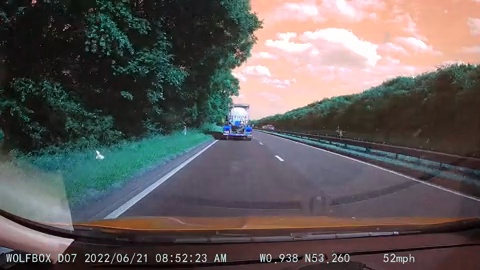

In [125]:
import cv2
img = cv2.imread('/content/frame3.jpg')

das = img[252:264,259:351,:]
longIm = img[252:264,259:305,:]
latIm = img[252:264,305:356,:]
speedIm = img[252:264,380:420,:]

dashImage = Image.fromarray(img)
dashImage = dashImage.convert('RGB')
dashImage

In [126]:
#Display Longitude
longImage = Image.fromarray(longIm)
longImage = longImage.convert('RGB')
longImage

In [127]:
#Display Latitude
latImage = Image.fromarray(latIm)
latImage = latImage.convert('RGB')
latImage

In [128]:
#Display Speed
speedImage = Image.fromarray(speedIm)
speedImage = speedImage.convert('RGB')
speedImage

In [129]:
from PIL import ImageOps
from PIL import ImageEnhance

def imageProcVariable(CV2im):
  #convert to pil
  im_pil = Image.fromarray(CV2im)
  im_pil = im_pil.convert('RGB')

  #greyscale
  gray_image = ImageOps.grayscale(im_pil)

  #invert
  inv = ImageOps.invert(gray_image)

  #enhance contrast
  enh = ImageEnhance.Contrast(inv)
  enh = enh.enhance(2)

  #binarize
  threshold = 118
  thresh = enh.point( lambda p: 255 if p > threshold else 0 )
  bw = thresh.convert('1')

  return bw

In [130]:
longImProc = imageProcVariable(longIm)
latImProc = imageProcVariable(latIm)
speedImProc = imageProcVariable(speedIm)
extractedLong = pytesseract.image_to_string(longImProc,config='--psm 7 -c tessedit_char_whitelist=NSEW0123456789.')
extractedLat = pytesseract.image_to_string(latImProc,config='--psm 7 -c tessedit_char_whitelist=NSEW0123456789.')
extractedSpeed = pytesseract.image_to_string(speedImProc,config='--psm 7 -c tessedit_char_whitelist=0123456789')
print(len(extractedLong))
print(len(extractedLat))
print(len(extractedSpeed))

9
11
9


In [131]:
import re
def formatOCR(info):
  #replace 'B' and 'O' if mistaken
  ex = info.replace('B','8')
  ex = ex.replace('O','0')

  #remove any extra characters
  rex = re.sub(r"[^a-zA-Z0-9.]"," ",ex)

  #remove trailing . or space
  rex = rex.rstrip(" ")
  rex = rex.rstrip(".")

  #replace mid space with '.'
  rex = rex.replace(" ", ".")

  #replace .. with .
  rex = rex.replace("..", ".")
  return rex

def formatSpeed(info):
  rex = re.sub(r"[^0-9]","",info)
  return rex

longitude = formatOCR(extractedLong)
latitude = formatOCR(extractedLat)
speed = formatSpeed(extractedSpeed)

print("longitude:", longitude)
print("latitude:", latitude)
print("speed:", speed)

longitude: W0.938
latitude: N53.260
speed: 52
